In [1]:
import pandas as pd
import glob
import os

def loadData():
    # Check if the raw folder exists
    if not os.path.exists("/home/ahmed/deep-anomaly-ips/python/data/raw"):
        print("Raw data folder does not exist!")
        return

    csv_files = glob.glob("/home/ahmed/deep-anomaly-ips/python/data/raw/*.csv")

    if not csv_files:
        print("No CSV files found in raw data folder.")
        return
    
    combined_df = pd.DataFrame()

    for file in csv_files: 
        try:
            # Read the current CSV file into a DataFrame
            df = pd.read_csv(file)
            # Concatenate with the combined dataframe
            combined_df = pd.concat([combined_df, df], ignore_index=True)
        except Exception as e:
            print(f"Error reading {file}: {e}")
    
    if combined_df.empty:
        print("No data combined from the CSV files.")
        return
    

    return combined_df


In [2]:
df = loadData()

In [3]:
df.head(3)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
df.tail(3)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2830740,53,166,2,2,88,188,44,44,44.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830741,54726,81,1,1,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830742,53,202,2,2,102,158,51,51,51.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [6]:
df.shape

(2830743, 79)

In [7]:
df.columns = df.columns.str.strip()

df["Label"].value_counts()

Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [8]:
numeric_df = df.select_dtypes(include = ['int64','float64'])
print(f"numeric columns in dataset :{numeric_df.columns} and length of them are {len(numeric_df.columns)}")

numeric columns in dataset :Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag

In [9]:
category_df = df.select_dtypes(include = ['object'])
print(f"categorical columns in dataset : {category_df.columns} and length of them are {len(category_df.columns)}")

categorical columns in dataset : Index(['Label'], dtype='object') and length of them are 1


In [10]:

# calculate missing values in each column 
def countmissing(data):
    
    miss_vals = data.isnull().sum()
    # This goes through each column name (col) and its number of missing values (val)
    for col, val in miss_vals.items():
        if val!=0 :
            print(f"column {col} has {val} missing values amounting to the {(val/len(data))*100 : .2f}% of total")
    return 
# calculate duplicated rows 
def countduplicate(data):
    
    duplicated_rows = df.duplicated().sum()
    print(f" The number of the duplicated rows in the dataset is  {duplicated_rows} amounting to the {(duplicated_rows/len(data))*100 : .2f}% of total")
    return

In [11]:
countmissing(df)
# drop missing values in Flow Bytes/s column
df.dropna(inplace=True)

column Flow Bytes/s has 1358 missing values amounting to the  0.05% of total


In [12]:
countduplicate(df)
# drop duplicates rows in dataset
df.drop_duplicates(inplace=True)

 The number of the duplicated rows in the dataset is  307376 amounting to the  10.86% of total


In [13]:
print(f"dataset deminson after removing duplicates : {df.shape}")

dataset deminson after removing duplicates : (2522009, 79)


In [14]:
def duplicate_columns(df):
    identical_cols = {}
    visitied = set()

    for i in range(len(df.columns)):
        col_1 = df.columns[i]

        for j in range(i+1,len(df.columns)):
            col_2 = df.columns[j]

            if col_2 not in visitied and df[col_1].equals(df[col_2]):
                if col_1 not in identical_cols:
                    identical_cols[col_1] = [col_2]
                else:
                    identical_cols[col_1].append(col_2)
                visitied.add(col_2)
    return identical_cols


def drop_duplicate_columns(df,identical_cols):
    col_to_drop = []

    for duplicates in identical_cols.values():
        col_to_drop.extend(duplicates)
    

    df.drop(columns=col_to_drop,inplace=True)


    return df

In [15]:
duplicates_cols = duplicate_columns(df)

In [16]:
if duplicates_cols :
    for original , copy in duplicates_cols.items():
        
        print(f"the column {original} is the same as  {copy}")

else:
    print("there is no duplicates in df")

the column Total Fwd Packets is the same as  ['Subflow Fwd Packets']
the column Total Backward Packets is the same as  ['Subflow Bwd Packets']
the column Fwd PSH Flags is the same as  ['SYN Flag Count']
the column Bwd PSH Flags is the same as  ['Bwd URG Flags', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
the column Fwd URG Flags is the same as  ['CWE Flag Count']
the column Fwd Header Length is the same as  ['Fwd Header Length.1']


In [17]:
df = drop_duplicate_columns(df,duplicates_cols)

In [18]:
df.shape

(2522009, 67)

In [19]:
# import numpy as np

# num_df = df.select_dtypes(include=['int64','float64'])
# num_cols = num_df.columns

# int_count = np.isinf(df[num_cols]).sum()

# inf_count[inf_count>0]

import numpy as np


In [20]:
df.replace([np.inf,-np.inf],np.nan,inplace=True)
df.dropna(inplace= True)

In [21]:
df.shape

(2520798, 67)

In [22]:
# unique columns value

for col in df.columns:
    if df[col].nunique()==1:
        print(f"{col} : {df[col].unique()}")

Bwd PSH Flags : [0]


In [23]:
df.drop('Bwd PSH Flags',axis=1,inplace=True)

In [24]:
df.shape

(2520798, 66)

In [25]:
del numeric_df
del category_df

In [26]:
numeric_df = df.select_dtypes(include = ['int64','float64'])

In [27]:
numeric_df.shape


(2520798, 65)

### Data Cleaning Summary

After performing the initial data cleaning steps, we have:

- Removed duplicate **rows** and **columns**.
- Dropped columns with only **a single unique value**, as they provide no useful information.
- Handled **infinite values** by replacing them with `NaN` and removing the corresponding rows.
- Ensured the dataset contains only relevant and clean numeric and categorical features.

---

### Correlation Analysis

Now that the dataset is cleaned, we proceed with **correlation analysis** to identify relationships between numerical features. This helps in feature selection, reducing multicollinearity, and understanding feature importance for modeling.


In [28]:
correlation_matrix = numeric_df.corr()

correlation_matrix 


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Destination Port,1.000000,-0.171653,-0.004648,-0.004352,0.009662,-0.003386,0.091295,-0.047039,0.137265,0.123361,...,-0.003540,0.001002,-0.040618,-0.048191,-0.058079,-0.027139,-0.127837,0.006825,-0.123517,-0.129399
Flow Duration,-0.171653,1.000000,0.020569,0.019388,0.063497,0.015997,0.263341,-0.115821,0.133964,0.224904,...,0.015726,-0.001235,0.184960,0.238482,0.289909,0.117236,0.764100,0.240353,0.775721,0.734097
Total Fwd Packets,-0.004648,0.020569,1.000000,0.999070,0.365510,0.996993,0.009070,-0.003258,-0.000264,0.001108,...,0.887386,-0.000181,0.039821,0.008206,0.030317,0.041185,0.001399,0.000675,0.001480,0.001264
Total Backward Packets,-0.004352,0.019388,0.999070,1.000000,0.359457,0.994430,0.008762,-0.002836,-0.000619,0.000741,...,0.882566,0.000021,0.038852,0.006317,0.028465,0.041185,0.001018,0.000363,0.001043,0.000936
Total Length of Fwd Packets,0.009662,0.063497,0.365510,0.359457,1.000000,0.353782,0.196238,-0.001748,0.185071,0.158871,...,0.407471,-0.001193,0.100412,0.102758,0.125752,0.067746,0.020619,0.026402,0.024038,0.016634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Active Min,-0.027139,0.117236,0.041185,0.041185,0.067746,0.039005,0.102868,-0.028131,0.079000,0.091534,...,0.031320,-0.006807,0.905749,0.032617,0.583815,1.000000,0.114721,0.036993,0.119240,0.109525
Idle Mean,-0.127837,0.764100,0.001399,0.001018,0.020619,0.000505,0.171685,-0.078586,0.119859,0.174597,...,0.000515,-0.000771,0.115738,0.032301,0.083203,0.114721,1.000000,0.146752,0.990237,0.990079
Idle Std,0.006825,0.240353,0.000675,0.000363,0.026402,0.000009,0.175450,-0.032458,0.176950,0.188833,...,0.000620,-0.003688,0.069012,0.080140,0.068136,0.036993,0.146752,1.000000,0.280957,0.007108
Idle Max,-0.123517,0.775721,0.001480,0.001043,0.024038,0.000489,0.190217,-0.080888,0.140521,0.194886,...,0.000603,-0.001305,0.128327,0.051156,0.097171,0.119240,0.990237,0.280957,1.000000,0.961251


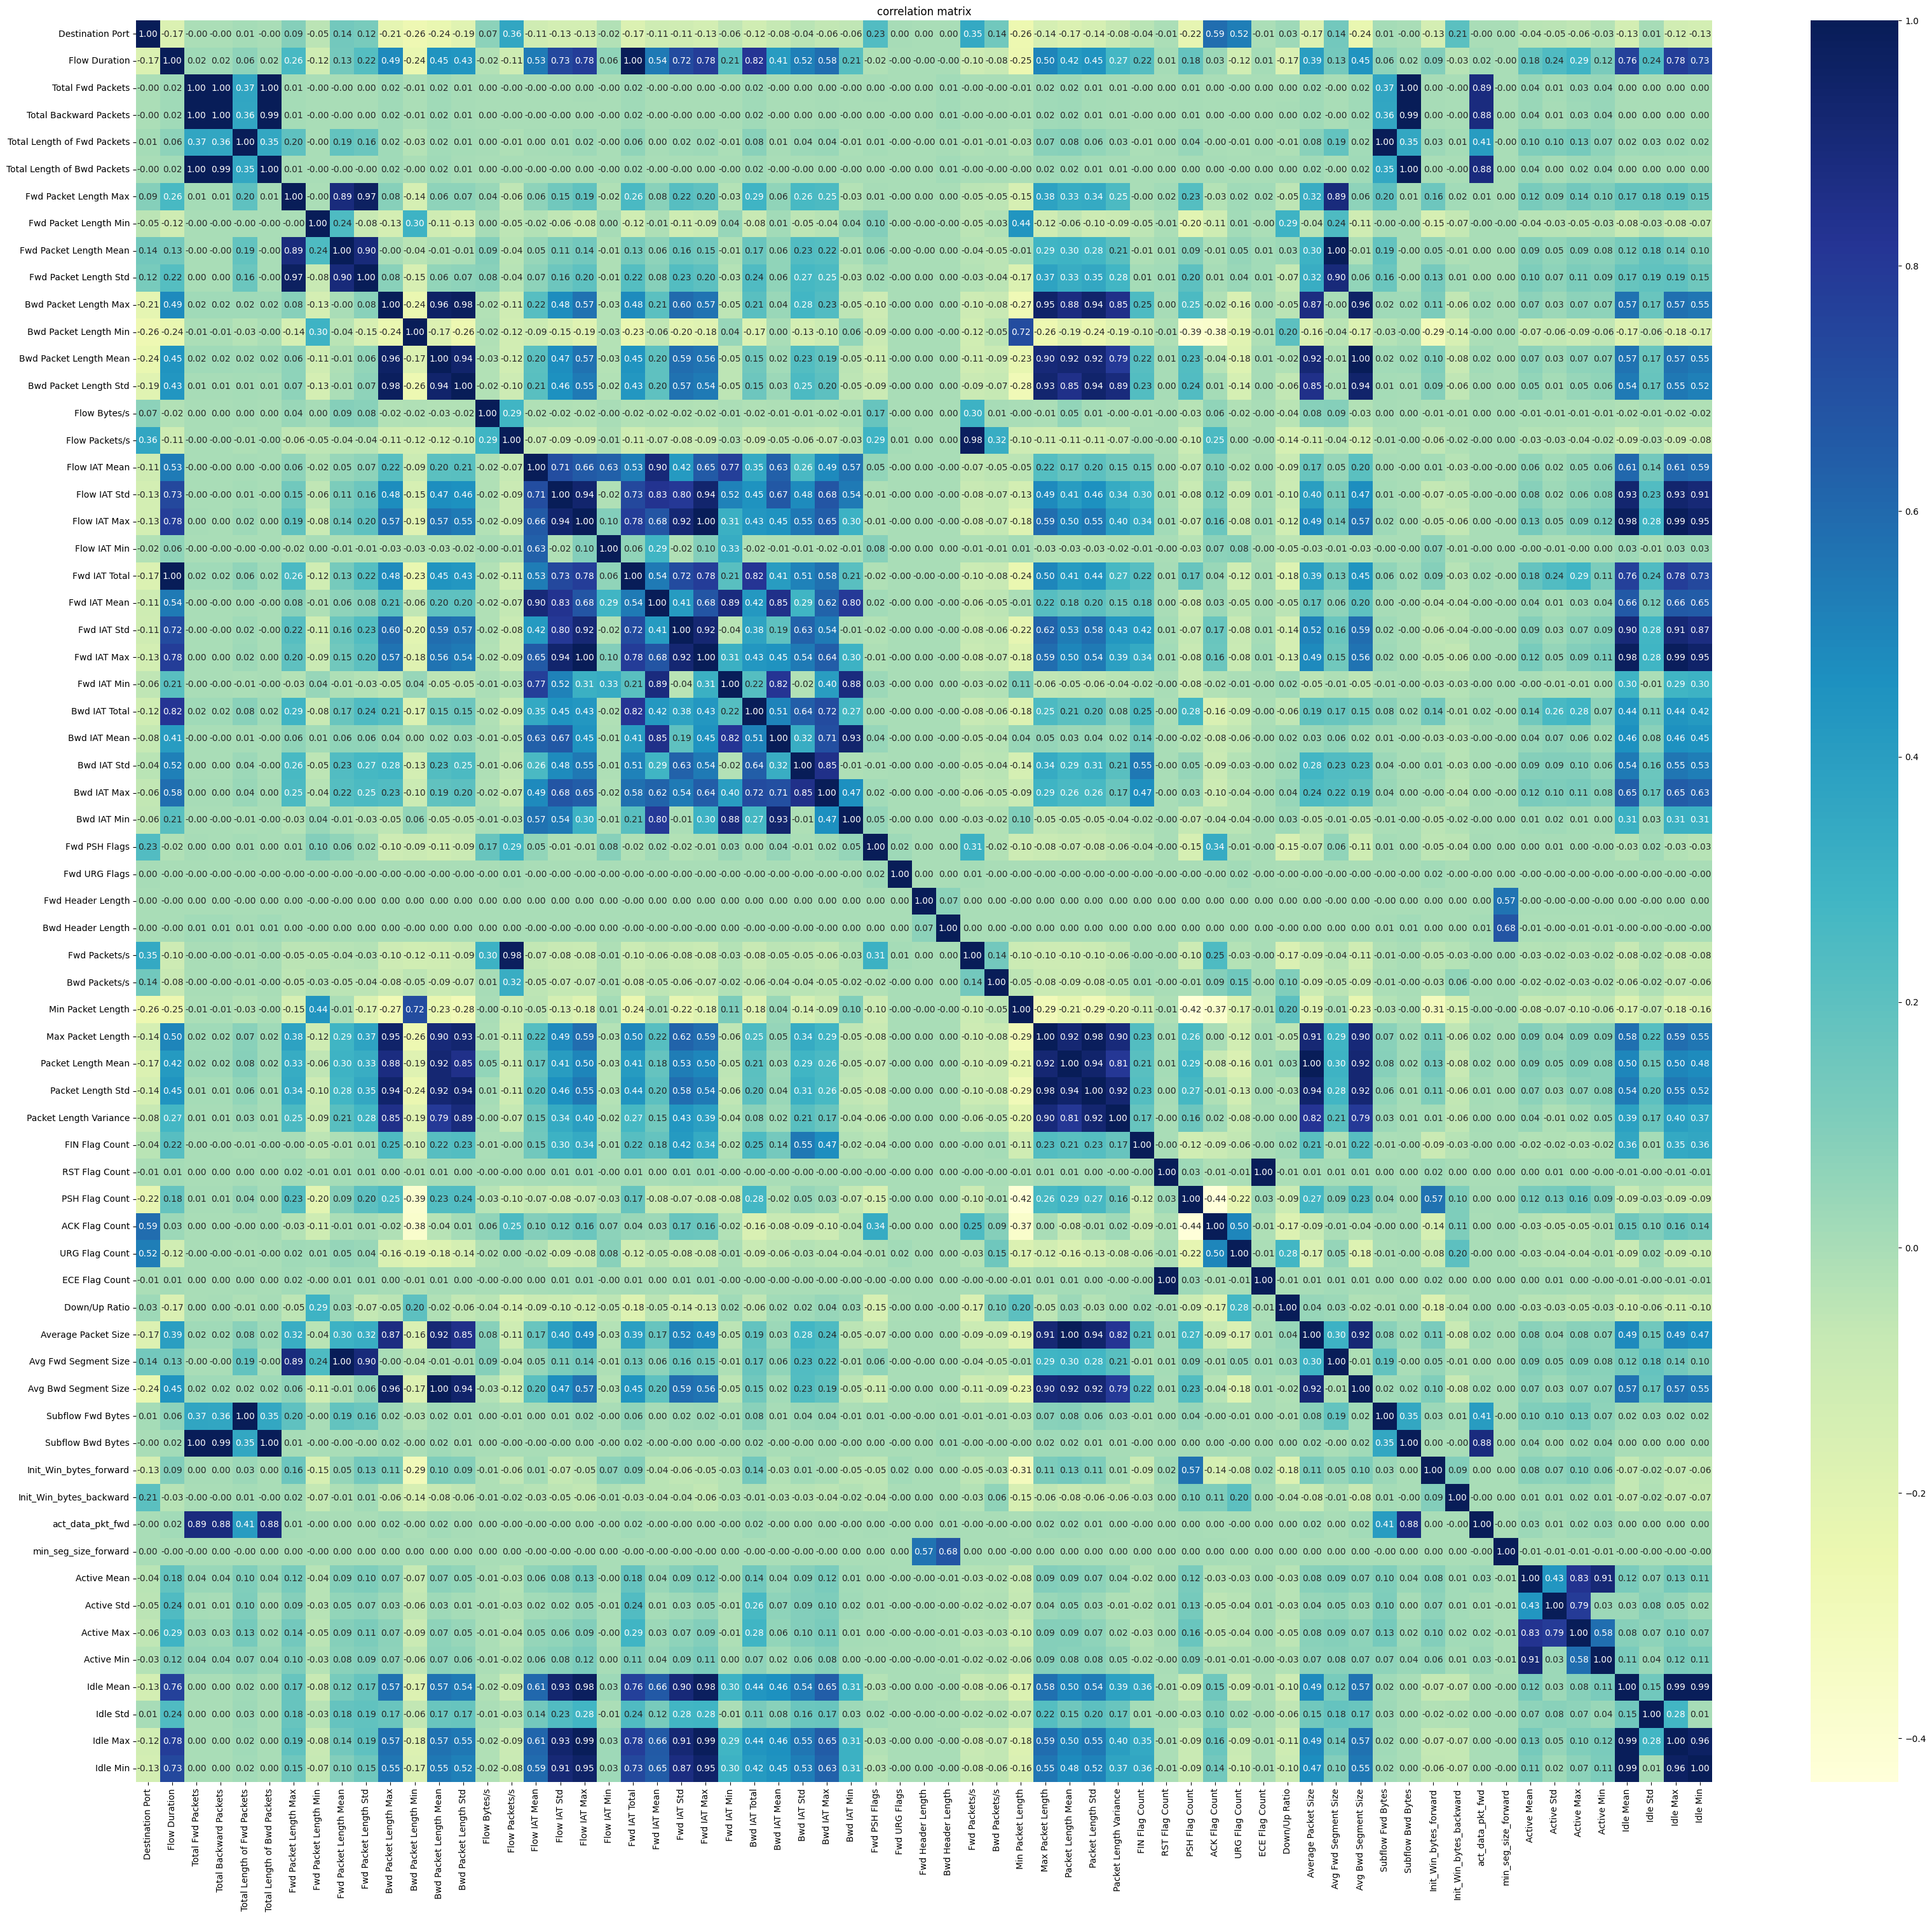

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40,36))

# A heatmap is a type of data visualization that uses color to show the strength of relationships between variables in a matrix.
# Seaborn's heatmap() function offers extensive customization options for creating informative and visually appealing heatmaps.

sns.heatmap(correlation_matrix,annot=True,cmap="YlGnBu",fmt='.2f')

plt.title("correlation matrix")

plt.show()




<Figure size 1400x1000 with 0 Axes>

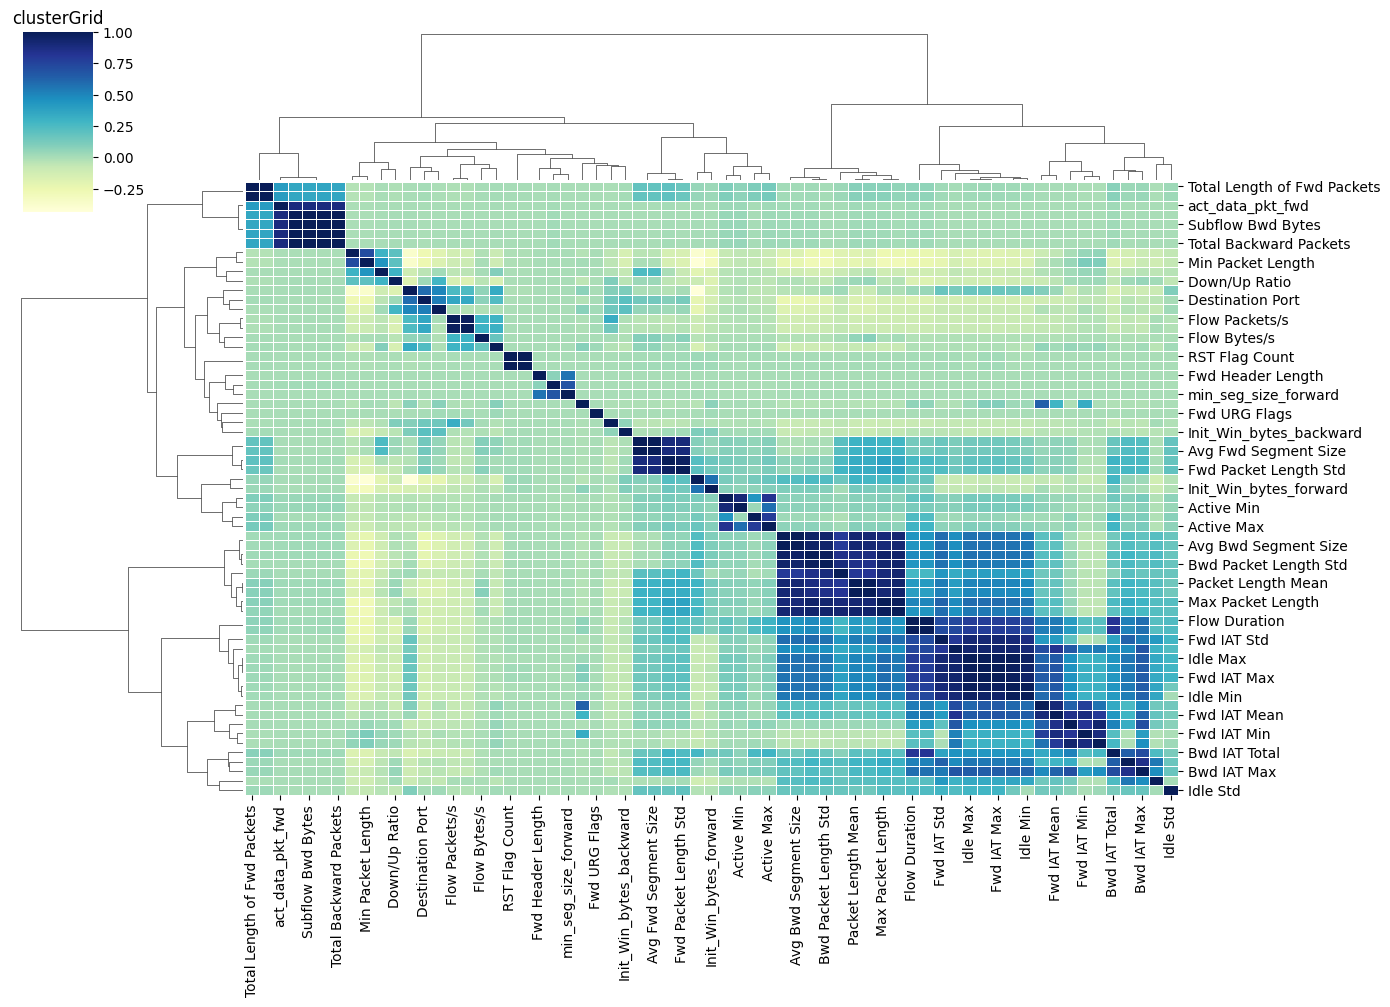

In [30]:
##  clustermap -->Plot a matrix dataset as a hierarchically-clustered heatmap.

plt.figure(figsize=(14,10))

sns.clustermap(correlation_matrix,method = 'ward',annot=False,cmap="YlGnBu",figsize=(14,10),linewidths=0.5)

plt.title("clusterGrid")
plt.show()

In [31]:
# use abs() take absolute value so that can catch both strong postive and negative correlations


correlation_matrix = correlation_matrix.abs()

# sets the threshold for considering features to be 
# high correlated
correlation_threshold = 0.85

mask = np.triu(correlation_matrix > correlation_threshold, k = 1)

# Uses np.where(mask) to get the indices of high-correlation pairs.
#Then uses those indices to get the actual column name pairs.
high_correlation_features = [(correlation_matrix.columns[i],correlation_matrix.columns[j]) for i,j in zip(*np.where(mask))]



In [32]:
# Result: a list of tuples like [('FeatureA', 'FeatureB'), ('FeatureC', 'FeatureD'), ...] — these are features with correlation > 0.85.

high_correlation_features

[('Flow Duration', 'Fwd IAT Total'),
 ('Total Fwd Packets', 'Total Backward Packets'),
 ('Total Fwd Packets', 'Total Length of Bwd Packets'),
 ('Total Fwd Packets', 'Subflow Bwd Bytes'),
 ('Total Fwd Packets', 'act_data_pkt_fwd'),
 ('Total Backward Packets', 'Total Length of Bwd Packets'),
 ('Total Backward Packets', 'Subflow Bwd Bytes'),
 ('Total Backward Packets', 'act_data_pkt_fwd'),
 ('Total Length of Fwd Packets', 'Subflow Fwd Bytes'),
 ('Total Length of Bwd Packets', 'Subflow Bwd Bytes'),
 ('Total Length of Bwd Packets', 'act_data_pkt_fwd'),
 ('Fwd Packet Length Max', 'Fwd Packet Length Mean'),
 ('Fwd Packet Length Max', 'Fwd Packet Length Std'),
 ('Fwd Packet Length Max', 'Avg Fwd Segment Size'),
 ('Fwd Packet Length Mean', 'Fwd Packet Length Std'),
 ('Fwd Packet Length Mean', 'Avg Fwd Segment Size'),
 ('Fwd Packet Length Std', 'Avg Fwd Segment Size'),
 ('Bwd Packet Length Max', 'Bwd Packet Length Mean'),
 ('Bwd Packet Length Max', 'Bwd Packet Length Std'),
 ('Bwd Packet Length 

In [33]:
distance_matrix = 1- correlation_matrix

linkage(y, method='single', metric='euclidean', optimal_ordering=False)

Perform hierarchical/agglomerative clustering

The input y may be either a 1-D condensed distance matrix or a 2-D array of observation vectors.

If y is a 1-D condensed distance matrix, then y must be a 
 sized vector, where n is the number of original observations paired in the distance matrix.

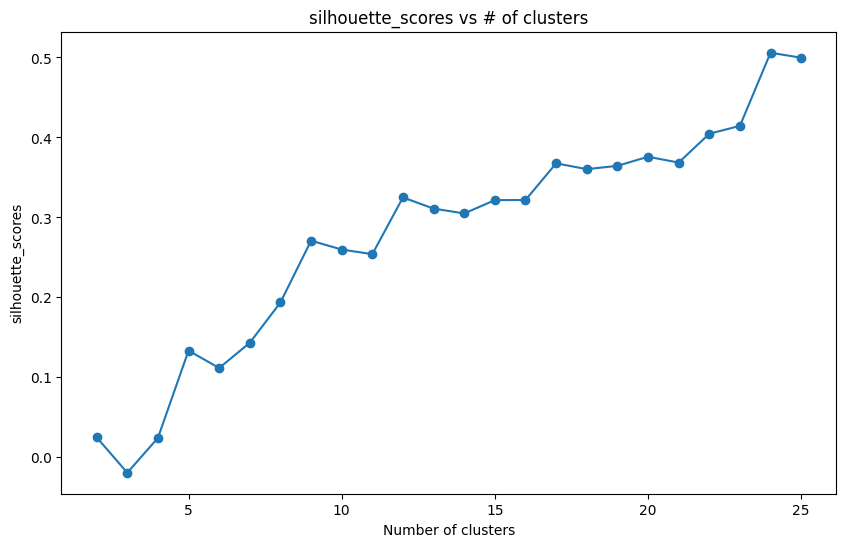

In [34]:
from scipy.cluster.hierarchy import linkage,fcluster
from scipy.spatial.distance import squareform
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

condensed_distance =  squareform(distance_matrix.abs())
linkage_matrix = linkage(condensed_distance,method="average")


# fcluster : Form flat clusters from the hierarchical clustering defined by the given linkage matrix.
#fcluster(Z, t=0.9, criterion='distance')

clusters = fcluster(linkage_matrix,t=0.2,criterion='distance')





n_clusters_range = range(2,26)
silhouette_scores = []


for n_clusters in n_clusters_range:
    clusterer = AgglomerativeClustering(
        n_clusters=n_clusters,
        metric='precomputed',  
        linkage='average'
    )
    cluster_labels = clusterer.fit_predict(distance_matrix)
    silhouette_avg = silhouette_score(distance_matrix, cluster_labels)
    silhouette_scores.append(silhouette_avg)


# plot to find the optimal clusters

plt.figure(figsize=(10,6))
plt.plot(n_clusters_range,silhouette_scores,marker = 'o')


plt.xlabel('Number of clusters')
plt.ylabel('silhouette_scores')

plt.title('silhouette_scores vs # of clusters')

plt.show()
    






In [35]:
optimal_k = n_clusters_range[np.argmax(silhouette_scores)]

print(f"Optimal number of clusters: {optimal_k}")


Optimal number of clusters: 24


In [36]:
final_clusterer = AgglomerativeClustering(
    n_clusters=optimal_k,
    metric='precomputed',
    linkage='average'
)
optimal_clusters = final_clusterer.fit_predict(distance_matrix)

# Create feature groups with optimal clustering
optimal_feature_clusters = pd.DataFrame({
    'Feature': correlation_matrix.columns, 
    'Cluster': optimal_clusters
})
optimal_clustered_features = optimal_feature_clusters.groupby('Cluster')['Feature'].apply(list)

# Print the clusters
for cluster_id, features in optimal_clustered_features.items():
    print(f"Cluster {cluster_id}: {features}")


Cluster 0: ['Active Mean', 'Active Std', 'Active Max', 'Active Min']
Cluster 1: ['PSH Flag Count', 'Init_Win_bytes_forward']
Cluster 2: ['Destination Port', 'ACK Flag Count', 'URG Flag Count']
Cluster 3: ['Flow Duration', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Total', 'Fwd IAT Std', 'Fwd IAT Max', 'Bwd IAT Total', 'Bwd IAT Std', 'Bwd IAT Max', 'Idle Mean', 'Idle Max', 'Idle Min']
Cluster 4: ['Flow Packets/s', 'Fwd Packets/s']
Cluster 5: ['Bwd Packet Length Max', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'Average Packet Size', 'Avg Bwd Segment Size']
Cluster 6: ['Bwd Packet Length Min', 'Min Packet Length']
Cluster 7: ['Flow IAT Mean', 'Fwd IAT Mean', 'Fwd IAT Min', 'Bwd IAT Mean', 'Bwd IAT Min']
Cluster 8: ['Bwd Header Length', 'min_seg_size_forward']
Cluster 9: ['Bwd Packets/s']
Cluster 10: ['Total Length of Fwd Packets', 'Subflow Fwd Bytes']
Cluster 11: ['Total Fwd Packets', 'Total Ba

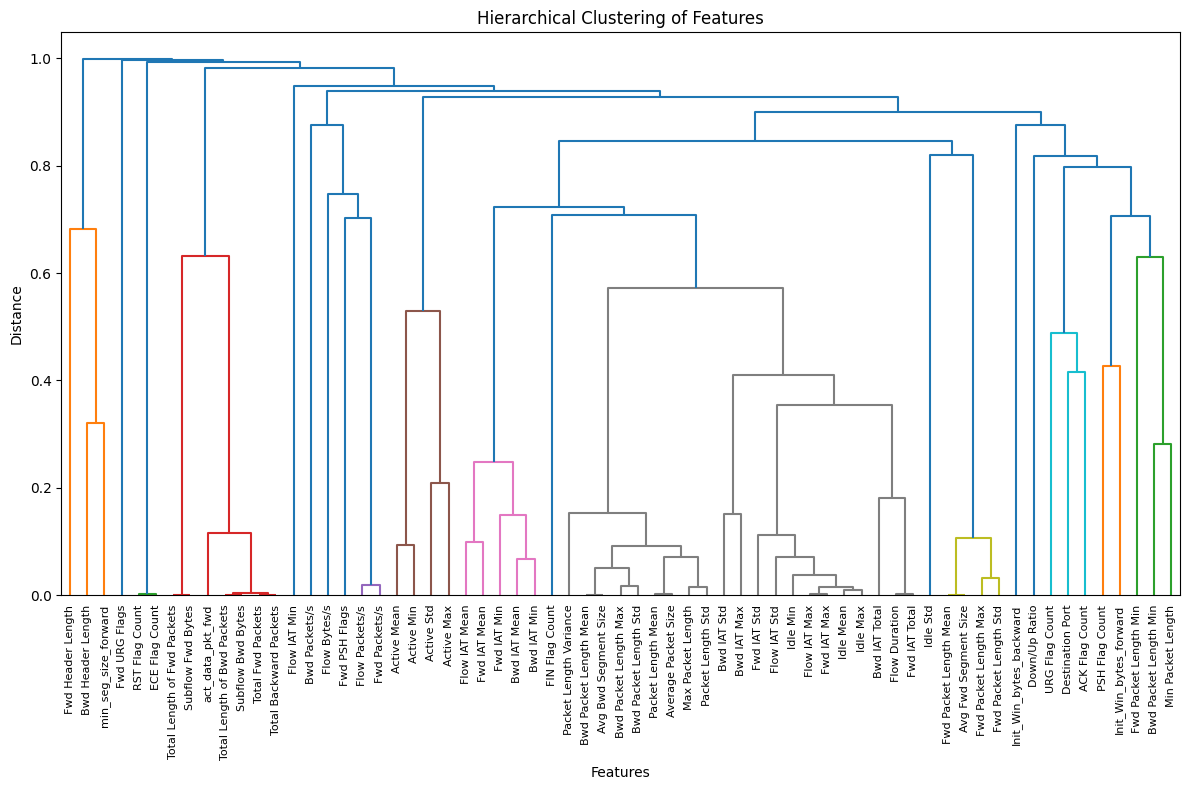

In [37]:
# draw dendrogram
from scipy.cluster.hierarchy import dendrogram


plt.figure(figsize= (12,8))
plt.title('Hierarchical Clustering of Features')
plt.xlabel('Features')
plt.ylabel('Distance')


dendrogram(
    linkage_matrix,
    leaf_rotation=90.,  
    leaf_font_size=8., 
    labels = correlation_matrix.columns
)

plt.tight_layout()
plt.show()





<Figure size 1400x1200 with 0 Axes>

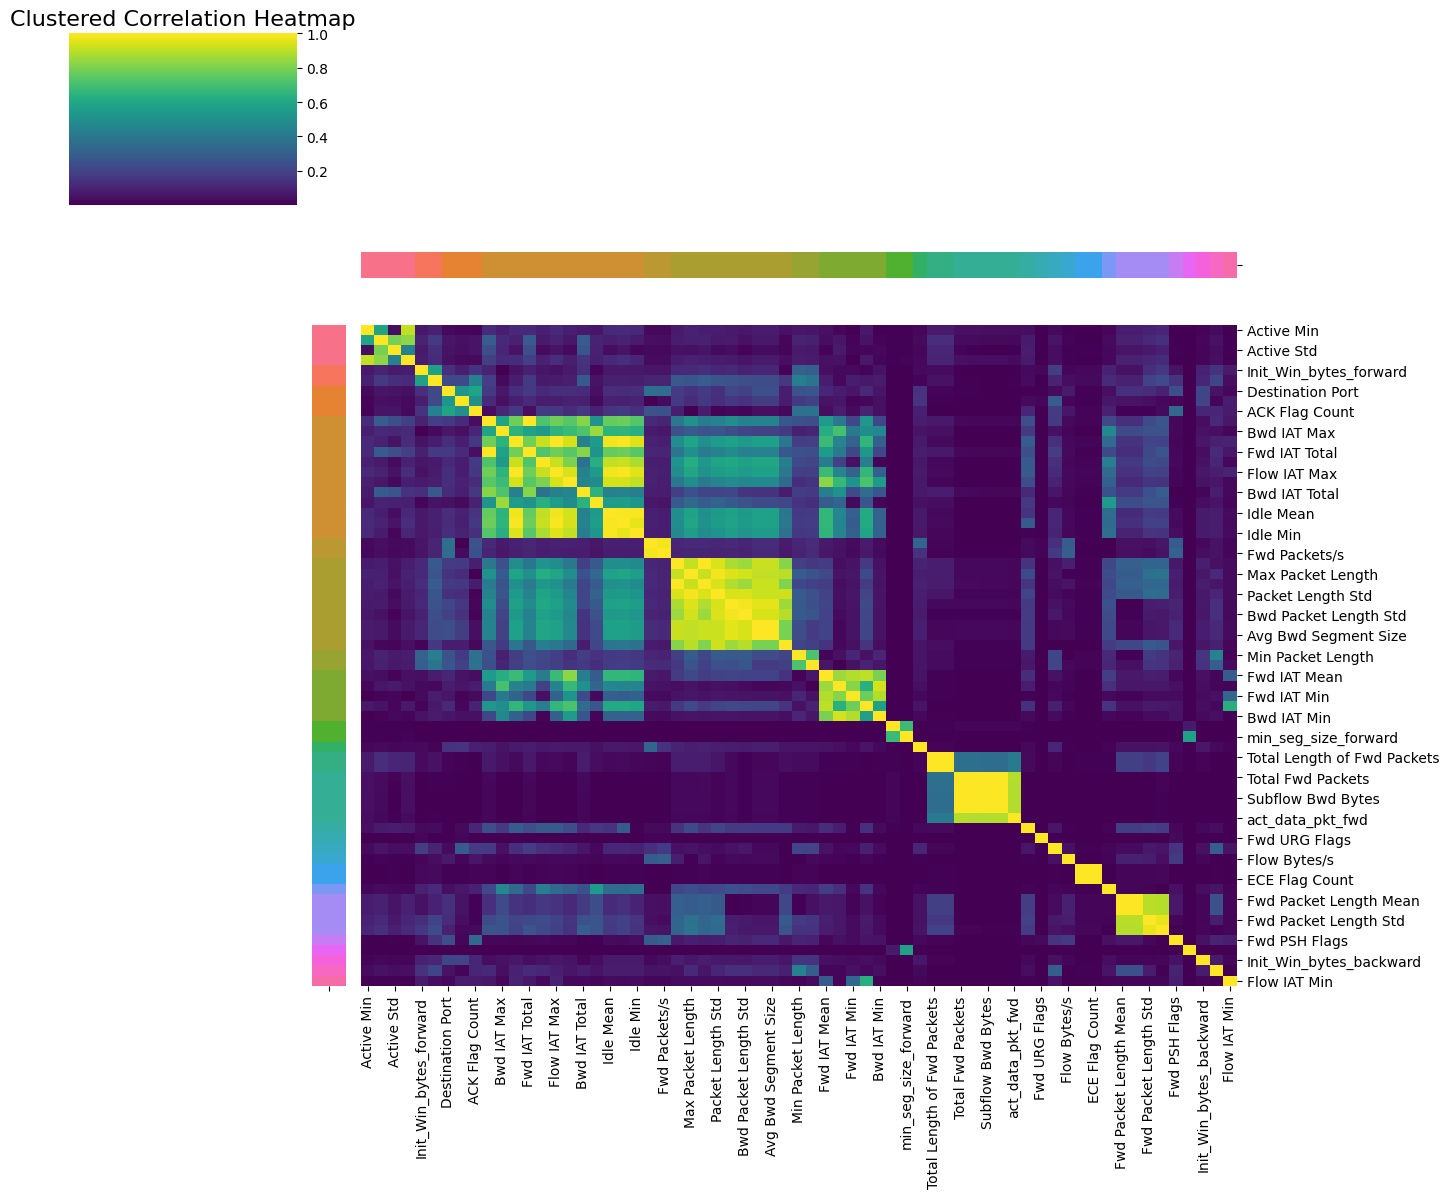

In [38]:
optimal_feature_clusters_sorted = optimal_feature_clusters.sort_values('Cluster')
ordered_features = optimal_feature_clusters_sorted['Feature'].tolist()

ordered_corr = correlation_matrix.loc[ordered_features, ordered_features]

cluster_ids = optimal_feature_clusters['Cluster'].unique()
cluster_colors = sns.color_palette("husl", n_colors=len(cluster_ids))

row_colors = []
for feature in ordered_features:
    cluster = optimal_feature_clusters.loc[optimal_feature_clusters['Feature'] == feature, 'Cluster'].values[0]
    row_colors.append(cluster_colors[cluster])

plt.figure(figsize=(14, 12))
g = sns.clustermap(
    ordered_corr,
    row_colors=pd.Series(row_colors, index=ordered_features),
    col_colors=pd.Series(row_colors, index=ordered_features),
    figsize=(14, 12),
    cmap="viridis",
    row_cluster=False, 
    col_cluster=False
)
plt.title('Clustered Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

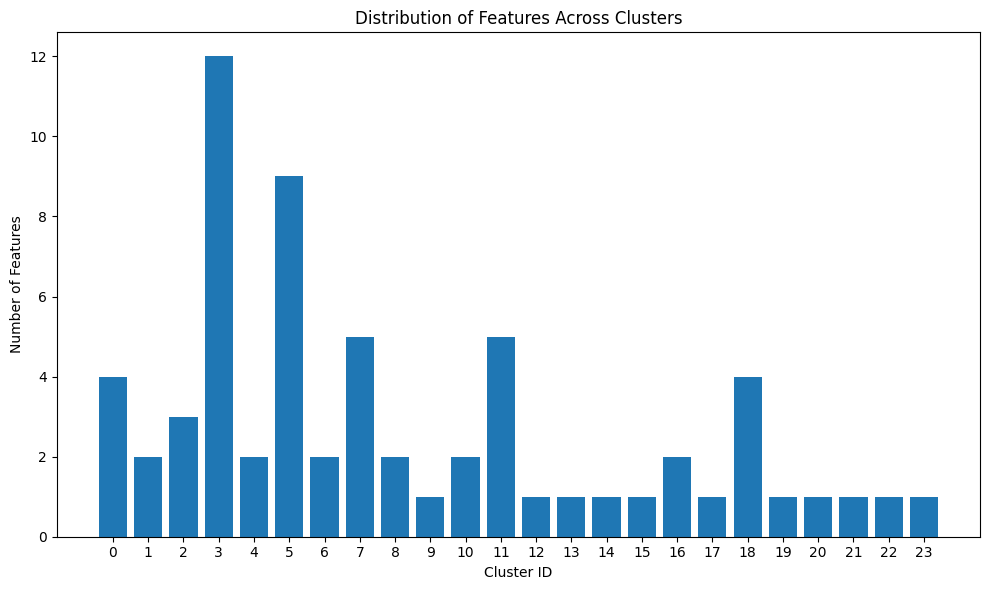

In [39]:

plt.figure(figsize=(10, 6))
cluster_counts = optimal_feature_clusters['Cluster'].value_counts().sort_index()
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster ID')
plt.ylabel('Number of Features')
plt.title('Distribution of Features Across Clusters')
plt.xticks(cluster_counts.index)
plt.tight_layout()
plt.show()

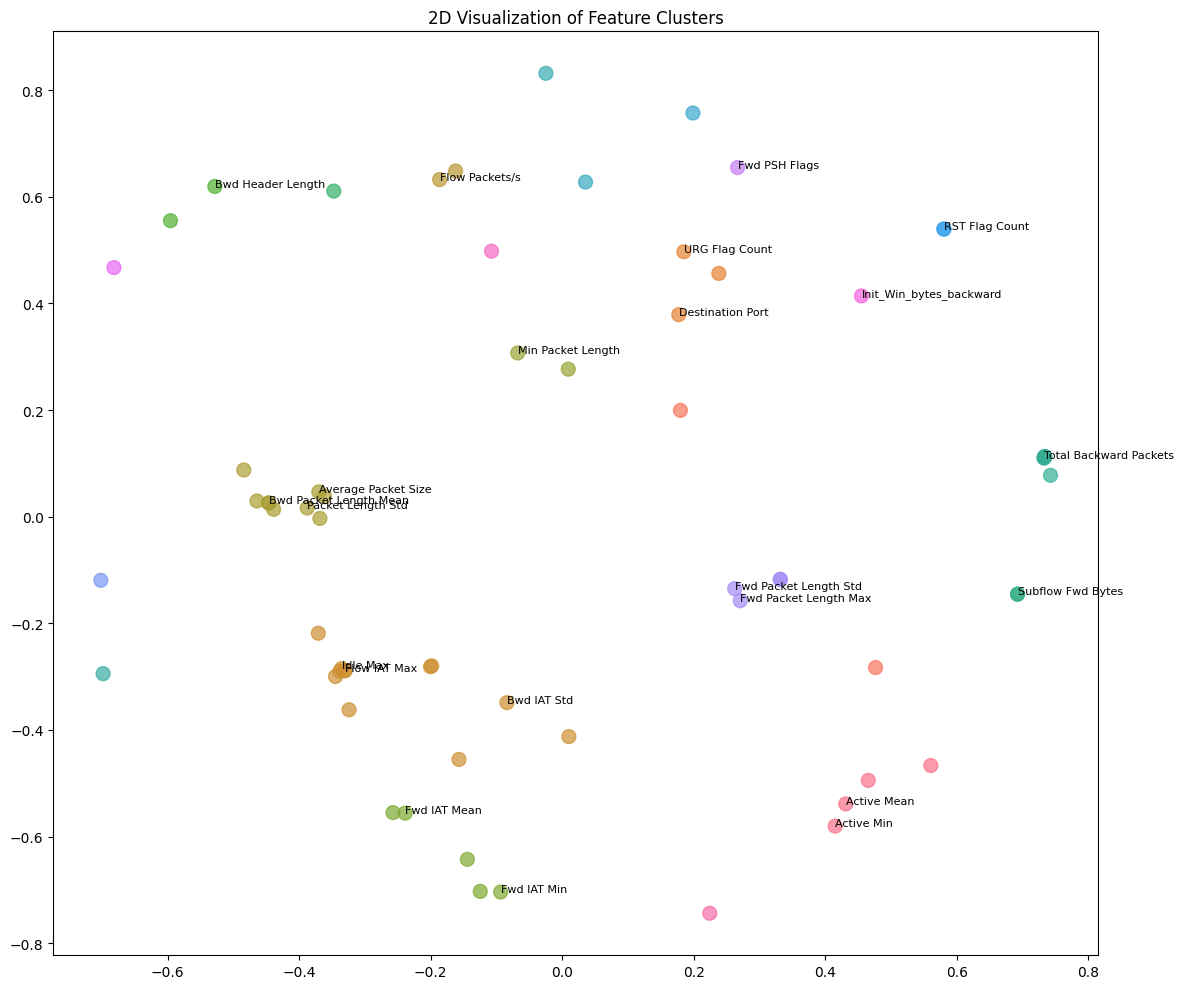

In [40]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
feature_positions = mds.fit_transform(distance_matrix)

plt.figure(figsize=(12, 10))

# Getting cluster for each feature
feature_to_cluster = dict(zip(optimal_feature_clusters['Feature'], optimal_feature_clusters['Cluster']))

#  colors list
colors = [cluster_colors[feature_to_cluster[feature]] for feature in correlation_matrix.columns]

# Scatter plot
plt.scatter(
    feature_positions[:, 0], 
    feature_positions[:, 1], 
    c=colors, 
    s=100, 
    alpha=0.7
)

for i, feature in enumerate(correlation_matrix.columns):
    # Only labelling some features to avoid overcrowding
    if i % 3 == 0:  # Labelling every 3rd feature for above reason
        plt.annotate(
            feature, 
            (feature_positions[i, 0], feature_positions[i, 1]),
            fontsize=8
        )

plt.title('2D Visualization of Feature Clusters')
plt.tight_layout()
plt.show()

In [41]:
temp_df = df.copy()

In [42]:
temp_df.shape

(2520798, 66)

In [43]:
from sklearn.decomposition import PCA

active_features = temp_df[['Active Mean', 'Active Std', 'Active Max', 'Active Min']]
pca = PCA(n_components=1)
temp_df['Active_Profile'] = pca.fit_transform(active_features)
print("Explained Variance Ratio for 'Active_Profile' composite feature:", pca.explained_variance_ratio_[0])



Explained Variance Ratio for 'Active_Profile' composite feature: 0.8266412466340132


In [44]:
features = temp_df[['Fwd Packet Length Max', 'Fwd Packet Length Mean', 'Fwd Packet Length Std']]
pca2 = PCA(n_components=1)
temp_df['Fwd Packet Length_Profile'] = pca2.fit_transform(features)
print("Explained Variance Ratio:", pca2.explained_variance_ratio_[0])


Explained Variance Ratio: 0.9826075754742589


In [45]:
features1 = temp_df[['Total Length of Bwd Packets', 'Subflow Bwd Bytes', 'Total Fwd Packets', 'Total Backward Packets']]
pca3 = PCA(n_components=1)
temp_df['Total Packets and Subflow Bwd Profile'] = pca3.fit_transform(features1)
print("Explained Variance Ratio:", pca3.explained_variance_ratio_[0])

Explained Variance Ratio: 0.9999999286575968


In [46]:
temp_df['Fwd Flow IAT Max']=(temp_df['Flow IAT Max']+temp_df['Fwd IAT Max'])/2


In [47]:
features2 = temp_df[['Idle Mean', 'Idle Max']]
pca4 = PCA(n_components=1)
temp_df['Idle Mean and Max Profile'] = pca4.fit_transform(features2)
print("Explained Variance Ratio:", pca4.explained_variance_ratio_[0])

Explained Variance Ratio: 0.995122965375465


In [48]:
features3 = temp_df[['Fwd Flow IAT Max', 'Idle Mean and Max Profile']]
pca5 = PCA(n_components=1)
temp_df['Fwd Flow IAT Max and Idle Profile'] = pca5.fit_transform(features3)
print("Explained Variance Ratio:", pca5.explained_variance_ratio_[0])

Explained Variance Ratio: 0.9941862983439064


In [49]:
temp_df['Flow Duration Fwd IAT Total'] = np.where(df['Fwd IAT Total'] != 0,df['Flow Duration'] / df['Fwd IAT Total'],df['Flow Duration'])

In [50]:
features4 = temp_df[['Avg Fwd Segment Size', 'Fwd Packet Length Mean']]
pca6 = PCA(n_components=1)
temp_df['Fwd Avg Segement and Packet Length Mean profile'] = pca6.fit_transform(features4)
print("Explained Variance Ratio:", pca6.explained_variance_ratio_[0])

Explained Variance Ratio: 1.0


In [51]:
features5 = temp_df[['Idle Mean', 'Idle Max', 'Idle Min']]
pca7 = PCA(n_components=1)
temp_df['Idle_Profile'] = pca7.fit_transform(features5)
print("Explained Variance Ratio:", pca7.explained_variance_ratio_[0])

Explained Variance Ratio: 0.9869644357724587


In [52]:
df.shape

(2520798, 66)

In [53]:
temp_df.shape

(2520798, 75)

In [54]:
to_drop=['Active Mean', 'Active Std', 'Active Max', 'Active Min','Fwd Packet Length Max', 'Fwd Packet Length Mean', 'Fwd Packet Length Std','Total Length of Bwd Packets', 'Subflow Bwd Bytes', 'Total Fwd Packets', 'Total Backward Packets','Flow IAT Max','Fwd IAT Max','Idle Mean', 'Idle Max','Fwd Flow IAT Max', 'Idle Mean and Max Profile','Fwd IAT Total','Flow Duration','Avg Fwd Segment Size', 'Fwd Packet Length Mean','Idle Min']

In [55]:
len(to_drop)

22

In [56]:
temp_df.drop(columns=[col for col in to_drop if col in temp_df.columns], inplace=True)


In [57]:
temp_df.shape

(2520798, 54)

In [58]:
print(temp_df.columns)

print(temp_df['Label'].value_counts())

del df
del numeric_df

Index(['Destination Port', 'Total Length of Fwd Packets',
       'Fwd Packet Length Min', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Min', 'Fwd IAT Mean',
       'Fwd IAT Std', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Fwd URG Flags', 'Fwd Header Length', 'Bwd Header Length',
       'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length',
       'Max Packet Length', 'Packet Length Mean', 'Packet Length Std',
       'Packet Length Variance', 'FIN Flag Count', 'RST Flag Count',
       'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'ECE Flag Count',
       'Down/Up Ratio', 'Average Packet Size', 'Avg Bwd Segment Size',
       'Subflow Fwd Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',


##  Tree-Based Models: Feature Importance & Outlier Detection

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = temp_df.drop('Label', axis=1)
y = temp_df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_sample = X_train.sample(n=50000, random_state=42)
y_sample = y_train.loc[X_sample.index]

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_sample, y_sample)


RandomForestClassifier(random_state=42)

In [60]:
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})

print(rf_importance)

                                            Feature  Importance
0                                  Destination Port    0.021668
1                       Total Length of Fwd Packets    0.051988
2                             Fwd Packet Length Min    0.003470
3                             Bwd Packet Length Max    0.025638
4                             Bwd Packet Length Min    0.010396
5                            Bwd Packet Length Mean    0.033565
6                             Bwd Packet Length Std    0.067982
7                                      Flow Bytes/s    0.011984
8                                    Flow Packets/s    0.014597
9                                     Flow IAT Mean    0.008685
10                                     Flow IAT Std    0.025335
11                                     Flow IAT Min    0.004990
12                                     Fwd IAT Mean    0.014636
13                                      Fwd IAT Std    0.029167
14                                      

In [61]:
rf_importance=rf_importance.sort_values(by="Importance", ascending=False).reset_index(drop=True)


In [62]:
rf_importance

,Feature,Importance
0,Packet Length Variance,0.071305
1,Packet Length Std,0.069115
2,Bwd Packet Length Std,0.067982
3,Total Length of Fwd Packets,0.051988
4,Subflow Fwd Bytes,0.049773
5,Average Packet Size,0.048203
6,Total Packets and Subflow Bwd Profile,0.048186
7,Avg Bwd Segment Size,0.044746
8,Packet Length Mean,0.034591
9,Fwd Packet Length_Profile,0.034419


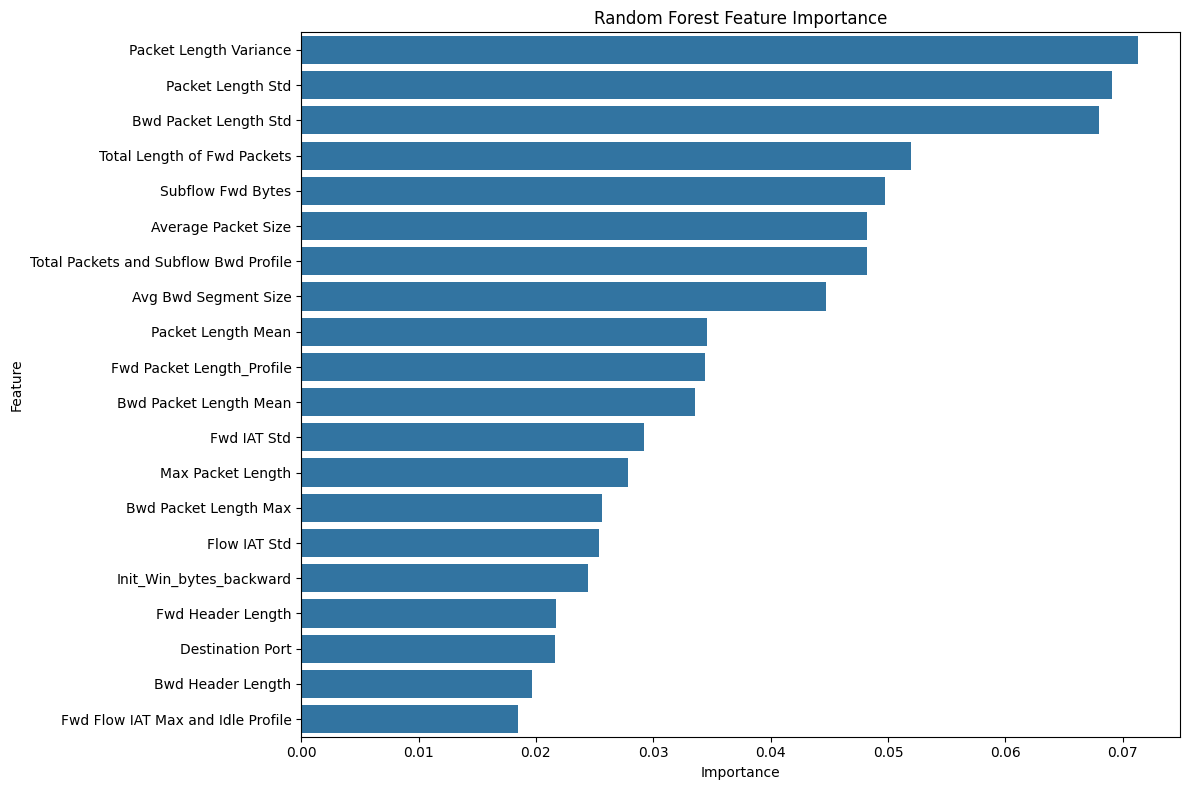

In [63]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=rf_importance.head(20))
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

In [64]:
def detect_outliers_iqr(df, num_df):
    outlier_stats = []
    for col in num_df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        
        outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        total_count = df[col].count()
        percentage = (outlier_count / total_count) * 100

        outlier_stats.append({
            'Column': col,
            'Outlier Count': outlier_count,
            'Total Count': total_count,
            'Outlier %': round(percentage, 2)
        })

    return pd.DataFrame(outlier_stats).sort_values(by='Outlier %', ascending=False)



In [65]:
outlier_summary = detect_outliers_iqr(temp_df, temp_df.drop('Label',axis=1))

In [66]:
outlier_summary

,Column,Outlier Count,Total Count,Outlier %
13,Fwd IAT Std,596378,2520798,23.66
25,Bwd Packets/s,589916,2520798,23.40
49,Fwd Flow IAT Max and Idle Profile,577358,2520798,22.90
48,Total Packets and Subflow Bwd Profile,575459,2520798,22.83
52,Idle_Profile,567235,2520798,22.50
50,Flow Duration Fwd IAT Total,566724,2520798,22.48
46,Active_Profile,558825,2520798,22.17
0,Destination Port,545620,2520798,21.64
15,Bwd IAT Total,527554,2520798,20.93
16,Bwd IAT Mean,519369,2520798,20.60


In [67]:
def treat_outliers(df, feature_importance_df, outlier_summary_df):
    # Convert feature importance to Series for easier access
    importance_series = pd.Series(
        feature_importance_df['Importance'].values, 
        index=feature_importance_df['Feature']
    )

    # Determine top 30% as high, bottom 20% as low importance
    sorted_features = importance_series.sort_values(ascending=False)
    num_features = len(sorted_features)
    high_importance = set(sorted_features.head(int(num_features * 0.30)).index)
    low_importance = set(sorted_features.tail(int(num_features * 0.20)).index)

    # Loop through outlier info
    for _, row in outlier_summary_df.iterrows():
        col = row['Column']
        outlier_pct = row['Outlier %']

        if col not in df.columns or col not in importance_series:
            continue

        importance = importance_series[col]
        if col in high_importance:
            importance_level = "high"
        elif col in low_importance:
            importance_level = "low"
        else:
            importance_level = "medium"
        if outlier_pct > 10:
            if importance_level == "high":
                df[col] = np.log1p(df[col].clip(lower=0))
            elif importance_level == "medium":
                df[col] = df[col].clip(upper=np.percentile(df[col], 95))
            else:
                df[col] = np.clip(df[col], df[col].quantile(0.05), df[col].quantile(0.95))
                if importance < 0.01:
                    df.drop(columns=[col], inplace=True)

        elif 5 < outlier_pct <= 10:
            if importance_level == "high":
                df[col] = np.sqrt(df[col].clip(lower=0))
            elif importance_level == "medium":
                df[col] = df[col].clip(df[col].quantile(0.01), df[col].quantile(0.99))
            else:
                df[col] = df[col].clip(upper=np.percentile(df[col], 95))

        elif 1 < outlier_pct <= 5:
            if importance_level == "high":
                pass  # Keep as-is
            elif importance_level == "medium":
                df[col] = df[col].clip(upper=np.percentile(df[col], 99))
            else:
                df[col] = df[col].mask(df[col] > df[col].quantile(0.99), df[col].median())

        else:  # outlier_pct ≤ 1
            if importance_level == "low" and importance < 0.005:
                df.drop(columns=[col], inplace=True)

    return df

In [68]:
def treat_outliers(df, feature_importance_df, outlier_summary_df):
    df_processed = df.copy()
    
    # Convert feature importance to Series
    l = list()  # List to track dropped features
    importance_series = pd.Series(
        feature_importance_df['Importance'].values, 
        index=feature_importance_df['Feature']
    )
    sorted_importance = importance_series.sort_values(ascending=False)
    high_cutoff = int(len(sorted_importance) * 0.30)
    low_cutoff = int(len(sorted_importance) * 0.80)  # bottom 20 of the features are being considered as low importance features
    
    high_importance = set(sorted_importance.iloc[:high_cutoff].index)
    low_importance = set(sorted_importance.iloc[low_cutoff:].index)
    common_features = set(importance_series.index) & set(outlier_summary_df['Column']) & set(df_processed.columns)
    outlier_info = {row['Column']: row['Outlier %'] for _, row in outlier_summary_df.iterrows() 
                    if row['Column'] in common_features}
    
    for col in common_features:
        outlier_pct = outlier_info[col]
        importance = importance_series[col]
        if col in high_importance:
            importance_level = "high"
        elif col in low_importance:
            importance_level = "low"
        else:
            importance_level = "medium"
        
        # Treatment logic based on outlier percentage and importance
        if outlier_pct > 10:
            if importance_level == "high":
                df_processed[col] = np.log1p(df_processed[col].clip(lower=0))
            elif importance_level == "medium":
                df_processed[col] = df_processed[col].clip(upper=np.percentile(df_processed[col], 95))
            elif importance < 0.005:
                l.append(col)
                df_processed.drop(columns=[col], inplace=True)
            else: 
                df_processed[col] = np.clip(df_processed[col], 
                                          df_processed[col].quantile(0.05), 
                                          df_processed[col].quantile(0.95))
        elif outlier_pct > 5:
            if importance_level == "high":
                df_processed[col] = np.sqrt(df_processed[col].clip(lower=0))
            elif importance_level == "medium":
                df_processed[col] = df_processed[col].clip(
                    df_processed[col].quantile(0.01), 
                    df_processed[col].quantile(0.99))
            else:
                df_processed[col] = df_processed[col].clip(upper=np.percentile(df_processed[col], 95))
        elif outlier_pct > 1:
            if importance_level == "high":
                pass  # Keep as-is,
            elif importance_level == "medium":
                df_processed[col] = df_processed[col].clip(upper=np.percentile(df_processed[col], 99))
            else:
                df_processed[col] = df_processed[col].mask(
                    df_processed[col] > df_processed[col].quantile(0.99), 
                    df_processed[col].median())
        elif importance_level == "low" and importance < 0.005:  # outlier_pct ≤ 1
            l.append(col)
            df_processed.drop(columns=[col], inplace=True)
    
    return df_processed, l

In [69]:
df, dropped_columns=treat_outliers(temp_df, rf_importance,outlier_summary)
del temp_df
dropped_columns

['Active_Profile',
 'Bwd IAT Min',
 'RST Flag Count',
 'URG Flag Count',
 'ECE Flag Count',
 'Bwd IAT Std',
 'Fwd URG Flags']

In [70]:
df.shape

(2520798, 47)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2520798 entries, 0 to 2830742
Data columns (total 47 columns):
 #   Column                                           Dtype  
---  ------                                           -----  
 0   Destination Port                                 int64  
 1   Total Length of Fwd Packets                      float64
 2   Fwd Packet Length Min                            int64  
 3   Bwd Packet Length Max                            float64
 4   Bwd Packet Length Min                            int64  
 5   Bwd Packet Length Mean                           float64
 6   Bwd Packet Length Std                            float64
 7   Flow Bytes/s                                     float64
 8   Flow Packets/s                                   float64
 9   Flow IAT Mean                                    float64
 10  Flow IAT Std                                     float64
 11  Flow IAT Min                                     int64  
 12  Fwd IAT Mean       

In [ ]:
df.to_csv('../data/processed/processed_data.csv',index=False)